## Machine Learning Linear Regression Project

In [1]:
%matplotlib inline

# Importing required modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np

In [146]:
# Imporing data from csv files
co2 = pd.read_csv('co2_emmission_global.csv')
temp = pd.read_csv('temperature_global.csv')
print(co2.head())
print(temp.head())

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [147]:
print "Minimum Year in CO2 data is year "+str(co2['Year'].min())
print "Maximum Year in CO2 data is year "+str(co2['Year'].max())

Minimum Year in CO2 data is year 1751
Maximum Year in CO2 data is year 2010


In [148]:
print "Minimum Year in temperature data is year "+str(temp['Year'].min())
print "Maximum Year in temperature data is year "+str(temp['Year'].max())

Minimum Year in temperature data is year 1880
Maximum Year in temperature data is year 2015


In [149]:
# So we could either delete the data so that year in both tables exist between 1880 and 2010
# or we could merge both data later with inner join

In [150]:
# In the co2 data we only needed the total and year column so the other column could be dropped

In [151]:
co2 = co2.iloc[:,:2] 
co2.rename(columns={'Total':'CO2'},inplace=True) # renaming column

In [152]:
# In the temperature data we could drop the Source column and use only 1 source

In [153]:
temp = temp[temp.Source != 'GISTEMP']
temp.drop('Source', inplace=True, axis=1)
temp.rename(columns={'Mean':'Mean_tmp'},inplace=True)

In [154]:
climate_data=temp.merge(co2,left_on='Year',right_on='Year',how='inner')

In [155]:
climate_data.isnull().any()

Year        False
Mean_tmp    False
CO2         False
dtype: bool

In [110]:
print climate_data.head()

   Year  Mean_tmp   CO2
0  2010    0.7008  9167
1  2009    0.6354  8740
2  2008    0.5415  8783
3  2007    0.6113  8566
4  2006    0.6139  8370


## Visualizing data

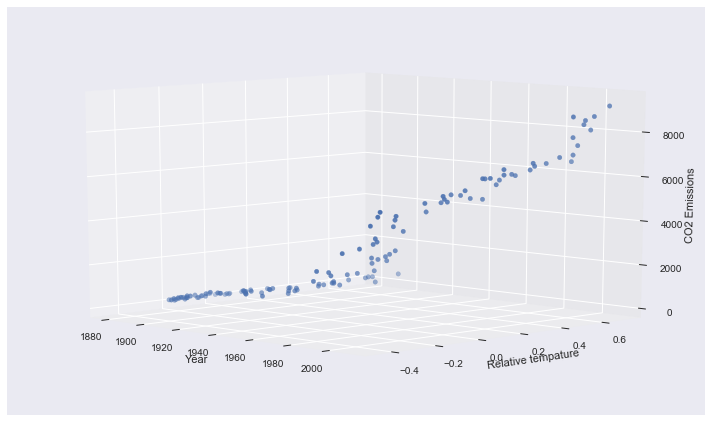

In [99]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5, 7.5)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=climate_data['Year'], ys=climate_data['Mean_tmp'], zs=climate_data['CO2'])

ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)

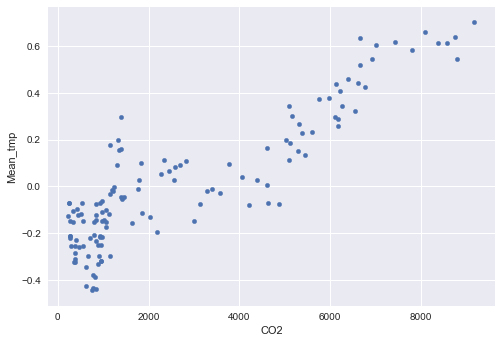

In [100]:
climate_data.plot(x='CO2',y='Mean_tmp',kind='scatter')

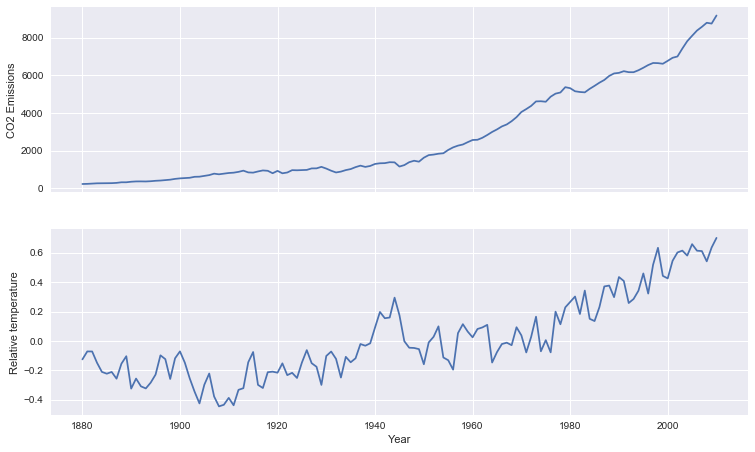

In [101]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(12.5, 7.5)
axarr[0].plot(climate_data['Year'], climate_data['CO2'])
axarr[0].set_ylabel('CO2 Emissions')
axarr[1].plot(climate_data['Year'], climate_data['Mean_tmp'])
axarr[1].set_xlabel('Year')
axarr[1].set_ylabel('Relative temperature')

## Linear Regression

In [166]:
# Splitting the data in trainig and testing
from sklearn.model_selection import train_test_split
X = climate_data[['Year','CO2']]
y = climate_data.Mean_tmp
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [167]:
# Importing linear regression classifier
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [168]:
reg.score(X_test,y_test)

0.86191034847735026